# Homework 4: Optimal Control
Due: May 14, 2025

## Preliminaries
Given the dynamics of a system $\dot{x}(t) = f(t, x(t), u(t))$ and the initial state $x(0)=x_0$. We want to calculate the optimal control signal $u(t)$ for the system to optimally track a desired trajectory $x_d(t)$ within the time horizon $[0,T]$.

$$
\begin{align}
u(t)^* &= \argmin_{u(t)} J(u(t)) \\
&= \argmin_{u(t)} \int_0^T \left[\underbrace{\left(x(t)-x_d(t)\right)^T Q_x\left(x(t)-x_d(t)\right) + u(t)^T R_u(t)}_{l(x(t),u(t))}\right] dt + \underbrace{\left(x(T) - x_d(T)\right)^T P_1\left(x(T)-x_d(T)\right)}_{m(x(T))} \\
\text{s.t. } \,\, &x(t) = x_0 + \int_0^t f\left(x(\tau), u(\tau)\right) d\tau
\end{align}
$$
We can solve this problem using iLQR. In the k-th interation, given the current estimation of the optimal control $u(t)^{[k]}$ and the corresponding system trajectory $x(t)^{[k]}$, we need to calculate the optimal descent direction, denoted as $v(t)^{[k]}$, through another optimal control problem below:

$$
v(t)^{[k]} = \argmin_{v(t)}\underbrace{\int_0^T \underbrace{D_1 l(x(t)^{[k]}, u(t)^{[k]})}_{a_x(t)}\cdot z(t) + \underbrace{D_2 l(x(t)^{[k]}, u(t)^{[k]})}_{b_u(t)}\cdot v(t) dt + \underbrace{D m(x(T)^{[k]})}_{p_1}\cdot z(T)}_{DJ(u(t))\cdot v(t)} + \int_0^T z(t)^T Q_z z(t) + v(t)^T R_v v(t) dt
$$

where $z(t)$ and $v(t)$ are governed by the following linear dynamics:

$$
z(t) = \underbrace{z_0}_{z_0=0} + \int_0^t \underbrace{D_1 f(x(\tau)^{[k]}, u(\tau)^{[k]})}_{A(\tau)}\cdot z(\tau) + \underbrace{D_2 f(x(\tau)^{[k]}, u(\tau)^{[k]})}_{B(\tau)} \cdot v(\tau) d\tau
$$

Once the optimal descent direction is calculated, we can use it to update the control for the next iteration using Armijo line search.

# Problem 1: 2-point Boundary Value Problem
The solution of $v(t)^{[k]}$ can be calculated through the following ODEs:

$$
\begin{align}
0 &= p(t)^T B(t) + b_v(t)^T \\
\dot{p}(t) &= -A(t)^T p(t) - a_z(t) \\
\dot{z}(t) &= A(t)z(t) + B(t)v(t)
\end{align}
$$
with initial and terminal conditions being:

$$
z(0) = 0 \,\,\,\, p(T) = p_1
$$

These ODEs can be reorganized into the following two-point boundary value problem, which does not involve $v(t)$ at all.

$$
\begin{bmatrix}
\dot{z}(t) \\ \dot{p}(t)
\end{bmatrix} = \underbrace{\begin{bmatrix}
M_{11} & M_{12} \\ M_{21} & M_{22}
\end{bmatrix}}_{M} \begin{bmatrix}
z(t) \\ p(t)
\end{bmatrix} + \begin{bmatrix}
m_1 \\ m_2
\end{bmatrix}, \,\,\,\, \begin{bmatrix}
z(0) \\ p(T)
\end{bmatrix} = \begin{bmatrix}
0 \\ p_1
\end{bmatrix}
$$

What should $a_z(t)$ $b_v(t)$ be? Note that they are different from the terms $a_x(t)$ and $b_u(t)$ above. What should the block matrix $M$ look like? What should the vectors $m_1$ and $m_2$ look like? (Hint: the block matrix $M$ and vectors $m_1$ and $m_2$ should not include $v(t)$ at all). Lastly, how to calculate $v(t)$ once you have solved the above two point boundary value problem.

**Turn in:** The expressions for $a_z(t), b_v(t)$, the block matrix $M$, the vectors $m_1$ and $m_2$, and $v(t)$ (assuming $p(t)$ and $z(t)$ are solved).

$$
a_z(t) = -A(t)^T p(t) - \dot{p}(t)
$$

$$
b_v(t) = -B(t)^Tp(t)
$$

$$
M = \begin{bmatrix}A(t) & 0 \\ 0 & -A(t)^T \end{bmatrix}
$$

$$
m_1 = -B(t)B(t)^{\dagger}b_v(t)
$$

$$
m_2 = -a_z(t)
$$

$$
v(t) = B(t)^{\dagger}\left(\dot{z}(t) - A(t)z(t)\right)
$$

# Problem 2: 2D Optimization Problem (Gradient Descent)
Solve the following 2D optimization problem for the variable $x = [x_1, x_2]$:

$$
\begin{align}
x^* &= \argmin_{x} f(x) \\
&= \argmin_{x} \left(0.26 \cdot \left(x_1^2+x_2^2\right)-0.46\cdot x_1 x_2\right)
\end{align}
$$

using gradient descent with Armijo line search. The line search process in each iteration is summarized in the pseudocode below. Note that, in practice, the parameter $\alpha$ should be small $[10^{-4}, 10^{-2}]$ and the parameter $\beta$ should be between $[0.2, 0.8]$. Use the initial guess of the variable $x = [-4, -2]$, use the following parameters $\gamma_0 = 1, \alpha = 10^{-4}, \beta = 0.5, i = 100$ ($i$ is number of iterations).

### *Armijo Line Search Pseudocode*

<div style="text-align: center;">
  <img src="armijo_psuedocode.png" alt="Armijo Line Search Pseudocode" />
</div>

Create a plot showing the trajectory of the iterations over thee contour over the objective function.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

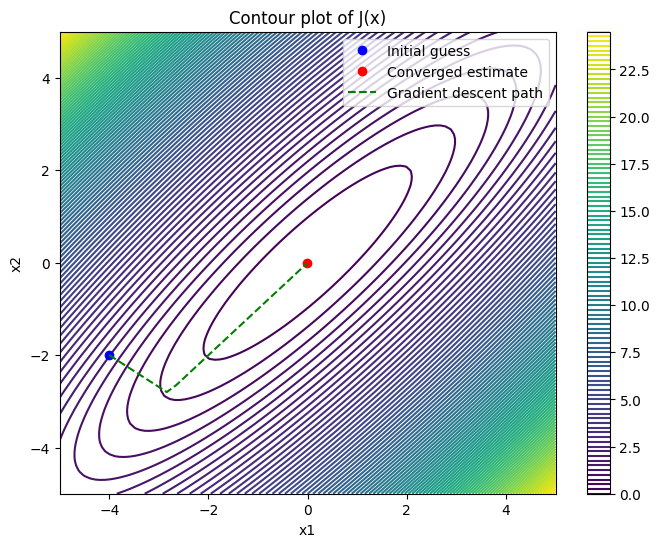

In [44]:
def J(x):
  # 0.26 * (x1^2 +x2^2) - 0.46 * x1 * x2
  return 0.26 * (x[0]**2 + x[1]**2) - 0.46 * x[0] * x[1]

def gradJ(x):
  # ∇J(x) = [dJ/dx1, dJ/dx2]
  # dJ/dx1 = 0.26 * 2 * x1 - 0.46 * x2
  # dJ/dx2 = 0.26 * 2 * x2 - 0.46 * x1
  # ∇J(x) = [0.52 * x1 - 0.46 * x2, 0.52 * x2 - 0.46 * x1]
  return np.array([0.52 * x[0] - 0.46 * x[1], 0.52 * x[1] - 0.46 * x[0]])

def armijo_condition(x_k, gamma, alpha, z_k):
  return J(x_k + gamma * z_k) > J(x_k) + alpha * gamma * gradJ(x_k).T @ z_k

def armijo_line_search(x_k, gamma_0=1.0, alpha=10e-4, beta=0.5):
  gamma = gamma_0
  z_k = -gradJ(x_k) # z_k = -∇J(x_k) -> descent direction
  while armijo_condition(x_k, gamma, alpha, z_k):
    gamma *= beta
  return x_k + gamma * z_k

def gradient_descent(x_0, epsilon=1e-6, max_iter=100):
  x_k = [x_0]
  for _ in range(max_iter):
    x_k_new = armijo_line_search(x_k[-1])
    x_k.append(x_k_new)
    gradient = gradJ(x_k_new)
    if np.linalg.norm(gradient) < epsilon:
      break
  x_k = np.array(x_k)
  return x_k[-1], x_k

def plot_contour(x_0):
  x_min, x = gradient_descent(x_0)
  x1 = np.linspace(-5, 5, 100)
  x2 = np.linspace(-5, 5, 100)
  X1, X2 = np.meshgrid(x1, x2)
  Z = J(np.array([X1, X2]))
  plt.figure(figsize=(8, 6))
  L = 100
  plt.contour(X1, X2, Z, levels=L, cmap='viridis')
  plt.plot(x_0[0], x_0[1], 'bo', label="Initial guess") # plot initial point
  plt.plot(x_min[0], x_min[1], 'ro', label="Converged estimate") # plot minimum point
  # plot gradient descent path
  plt.plot(x[:, 0], x[:, 1], 'g--', label="Gradient descent path")
  plt.colorbar()
  plt.title('Contour plot of J(x)')
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.legend()
  plt.show()

# Run gradient descent with initial guess x = [-4, -2]
x_0 = np.array([-4, -2])
plot_contour(x_0)

# Problem 3: iterative Linear Quadratic Regulator for Diff-Drive Vehicle
Apply iLQR to the diff-drive vehicle for a length of time $T=2\pi sec$ to track the desired trajectory $\left(x_d(t), y_d(t), \theta_d(t)\right) = \left(\frac{4}{2\pi}t, 0, \pi/2\right)$ subject to dynamics:

$$
\begin{equation}
\begin{bmatrix} \dot{x} \\ \dot{y} \\ \dot{\theta} \end{bmatrix} = \begin{bmatrix} \cos(\theta)u_1 \\ \sin(\theta)u_1 \\ u_2 \end{bmatrix} ,\,\,\,\, \left(x(0), y(0), \theta(0)\right) = (0, 0, \pi/2)
\end{equation}
$$

Note that the desired trajectory corresponds to an infeasible trajectory for parallel parking.